# Linear Regression with  Python Scikit Learn

In this section we use Scikit learn library to implement a linear regression function. We will start with simple liner regression involving two variables.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that student is expected to score based upon the number of hours they studied. 

 ### Importing all required library for this task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset to be used

In [2]:
data_path="http://bit.ly/w-data"
data=pd.read_csv(data_path)
data.head()                         # head print first 5 row by default

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [3]:
data.info()                         # To get overview of data(number of rows and columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
data.isnull().sum()                 # used to check for missing values 

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()                    # used to get the statical overview of the data 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Since the data is very small it contain only two variable with no missing values. Hence it is easy to visualize it using scatter plot.

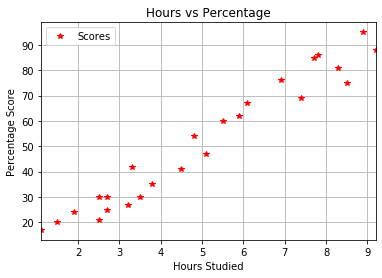

In [6]:
data.plot(x='Hours',y='Scores',style='r*')
plt.title('Hours vs Percentage')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

#### From the above graph we observe that as the number of hours of studies  increases the probability to score good marks increses.
#### There is positive relation between Hours studies vs Percentage Score. 

##### Now plotting the Regression line on data to show how it fit.

[]

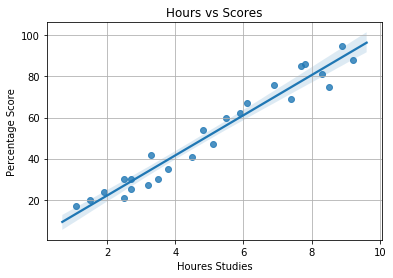

In [7]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Scores")
plt.xlabel("Houres Studies")
plt.ylabel("Percentage Score")
plt.grid()
plt.plot()

## Preparing the Data

#### We divide the data into "Attributes"(input) and "labels" (output)

In [8]:
x=data[['Hours']].values
y=data[['Scores']].values

After obtaning the attribute and labels, Now we split the data into training and testing data using scikit learn library on 80%-20% basis.

In [9]:
# Importing the required function and spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Training the model

Now we have train and test data we proceed to train our model using Linear Regression.

In [10]:
from sklearn.linear_model import LinearRegression

In [14]:
# Training the model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# obtaining the intercept and coefficient of liner model

inter = regression.intercept_
coeff = regression.coef_
print("The intercept is : ",inter)
print(" THe cofficient is :",coeff[0])

The intercept is :  [2.82689235]
 THe cofficient is : [9.68207815]


## Making Prediction from the Model

In [17]:
y_prediction = regression.predict(x_test)

Now we can visualize the model prediction (best fit line) on our training and testing data.

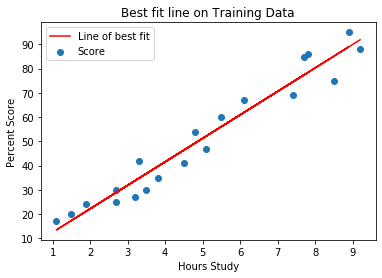

In [32]:
# visualizing the predictions with respect to our data

# for training data
plt.scatter(x_train,y_train, label="Score")
plt.plot(x_train, regression.predict(x_train),color='red', label='Line of best fit')
plt.xlabel("Hours Study")
plt.ylabel("Percent Score")
plt.title("Best fit line on Training Data")
plt.legend()
plt.show()

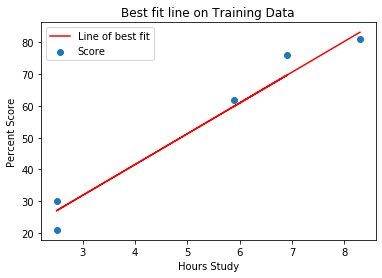

In [33]:
# for testing data

plt.scatter(x_test,y_test, label="Score")
plt.plot(x_test, regression.predict(x_test),color='red', label='Line of best fit')
plt.xlabel("Hours Study")
plt.ylabel("Percent Score")
plt.title("Best fit line on Training Data")
plt.legend()
plt.show()

## Making predictions

In [36]:
print("No of Hours = ",9.25)
print("Predicted Score in % = ",regression.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score in % =  92.38611528261494


## Evaluating the model

In [37]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_prediction))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_prediction))
print("Root mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error : 3.9207511902099244
Mean Squared Error : 18.943211722315272
Root mean Squared Error: 4.352380006653288
